In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

In [ ]:
def get_testing_results(df):
    X = df.drop('heart_attack', axis=1)
    y = df['heart_attack']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define models
    models = [
        GaussianNB(),
        LogisticRegression(),
        DecisionTreeClassifier()
    ]

    # Create lists to store results
    train_results = []
    test_results = []
    feature_importances = []

    # Loop through models and calculate metrics
    for model in models:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        cm_train = confusion_matrix(y_train, y_pred_train)
        cm_test = confusion_matrix(y_test, y_pred_test)
        f1_train = f1_score(y_train, y_pred_train)
        f1_test = f1_score(y_test, y_pred_test)
        fnr_train = cm_train[1, 0] / (cm_train[1, 0] + cm_train[1, 1])
        fnr_test = cm_test[1, 0] / (cm_test[1, 0] + cm_test[1, 1])
        train_results.append({'model': type(model).__name__, 'f1_score': f1_train, 'false_negative_rate': fnr_train})
        test_results.append({'model': type(model).__name__, 'f1_score': f1_test, 'false_negative_rate': fnr_test})

        # Get feature importances
        if isinstance(model, DecisionTreeClassifier):
            importances = model.feature_importances_
        elif isinstance(model, LogisticRegression):
            importances = np.abs(model.coef_[0])
        elif isinstance(model, GaussianNB):
            results = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
            importances = results.importances_mean
        feature_importances.append({
            'model': type(model).__name__,
            'feature_importances': importances
        })

    # Create DataFrames from the results
    train_results_df = pd.DataFrame(train_results)
    test_results_df = pd.DataFrame(test_results)

    print("Training Results:")
    print(train_results_df)
    print("\nTesting Results:")
    print(test_results_df)

    # Plot top 10 feature importances for each model
    for feature_importance in feature_importances:
        model_name = feature_importance['model']
        importances = feature_importance['feature_importances']
        top_10_importances = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)[:10]
        plt.figure(figsize=(12, 8))  # Make the graph bigger
        plt.bar([x[0] for x in top_10_importances], [x[1] for x in top_10_importances])
        plt.title(f"Top 10 Feature Importances for {model_name}")
        plt.xlabel("Feature")
        plt.ylabel("Importance")
        plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
        plt.tight_layout()  # Ensure the labels fit within the figure
        plt.show()

In [ ]:
df = pd.read_csv('HA_cleaned.csv')

c:\Users\user\anaconda3\envs\CUHK\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Results:
                    model  f1_score  false_negative_rate
0              GaussianNB  0.608979             0.420412
1      LogisticRegression  0.539422             0.514413
2  DecisionTreeClassifier  1.000000             0.000000

Testing Results:
                    model  f1_score  false_negative_rate
0              GaussianNB  0.610648             0.420332
1      LogisticRegression  0.527279             0.532356
2  DecisionTreeClassifier  0.530322             0.467449


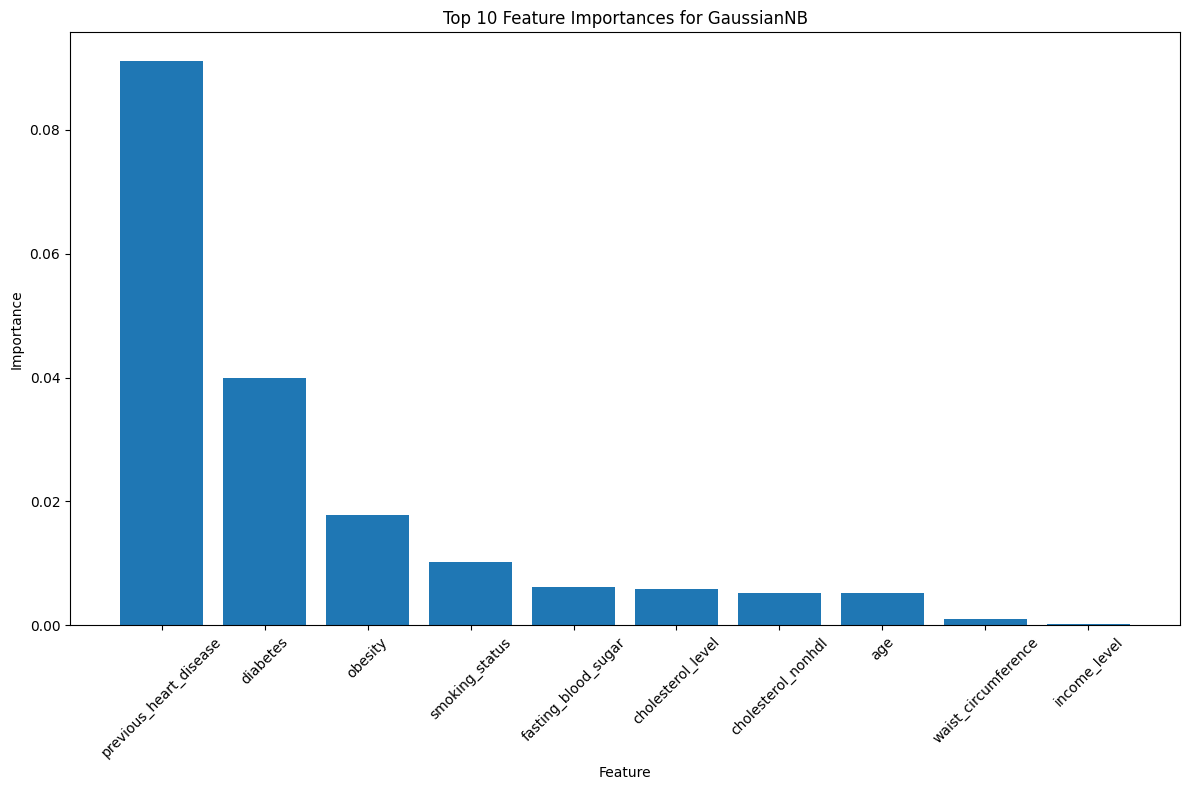

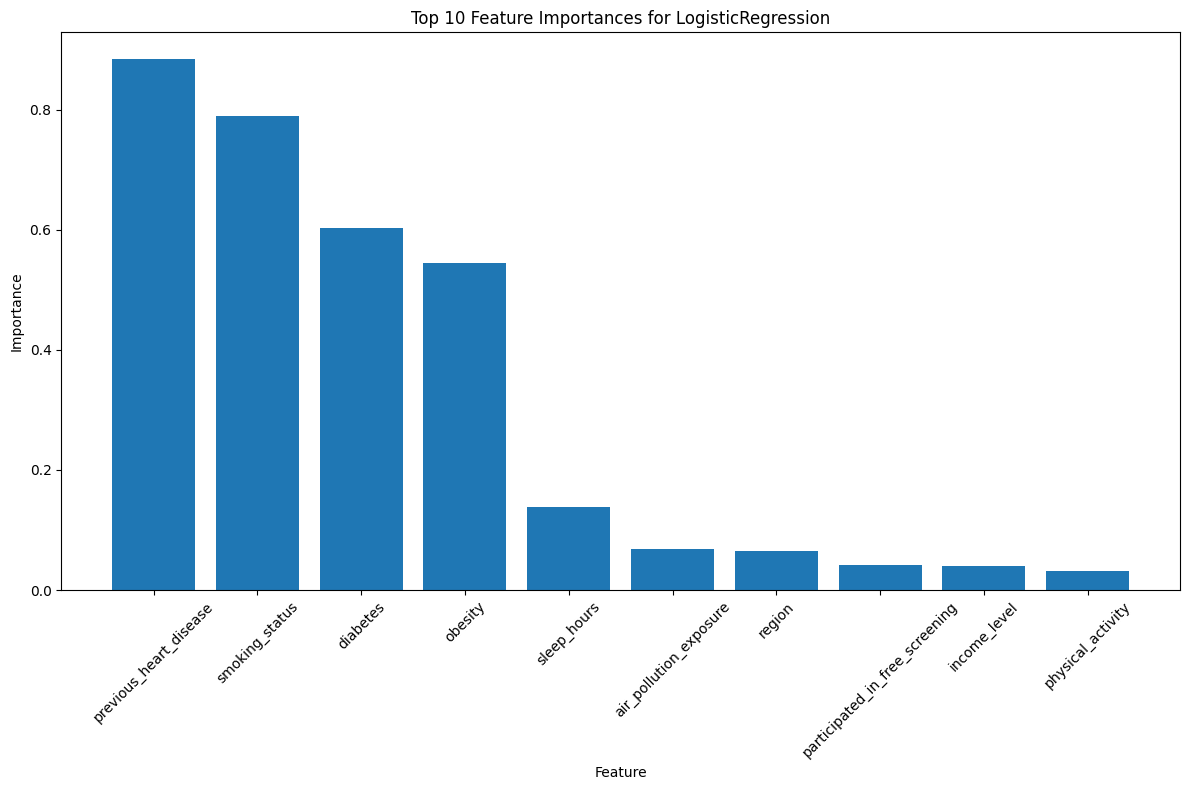

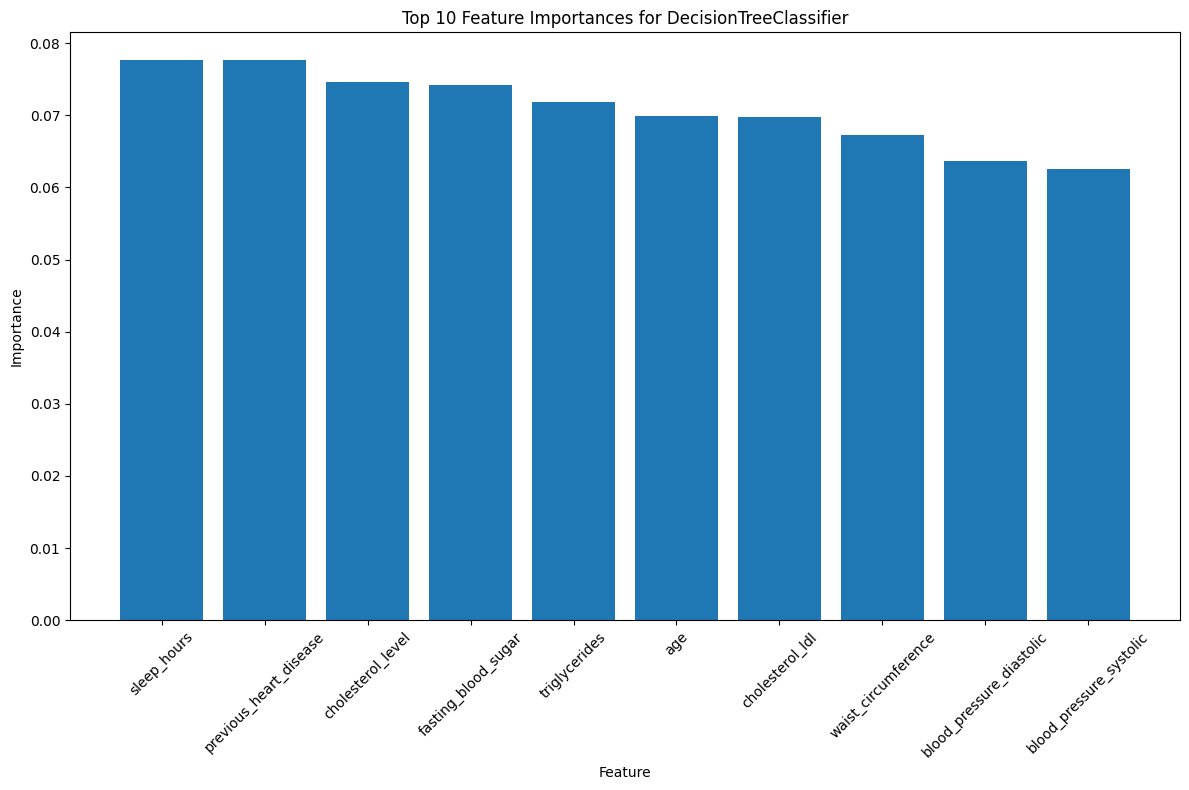

In [ ]:
get_testing_results(df)

In [ ]:
bin_col = ['gender','region','diabetes','obesity','family_history','alcohol_consumption','dietary_habits',
           'EKG_results','previous_heart_disease','medication_usage','participated_in_free_screening']

scaler = MinMaxScaler()

df_scaled = df.copy()

for col in df.columns:
    if col not in bin_col:
        df_scaled[col] = scaler.fit_transform(df_scaled[[col]])

print(df_scaled.head())

        age  gender  region  income_level  diabetes  obesity  \
0  0.569231       0       1           0.0         0        1   
1  0.738462       1       1           0.0         0        0   
2  0.415385       1       1           0.5         0        0   
3  0.738462       0       0           0.0         0        1   
4  0.600000       0       1           0.0         1        0   

   waist_circumference  family_history  smoking_status  alcohol_consumption  \
0             0.657143               1             0.5                    0   
1             0.442857               1             0.0                    0   
2             0.492857               0             1.0                    0   
3             0.507143               0             0.0                    0   
4             0.371429               1             0.0                    1   

   ...  fasting_blood_sugar  cholesterol_level  cholesterol_nonhdl  \
0  ...               0.3000              0.524            0.465517   


Training Results:
                    model  f1_score  false_negative_rate
0              GaussianNB  0.608979             0.420412
1      LogisticRegression  0.580899             0.484616
2  DecisionTreeClassifier  1.000000             0.000000

Testing Results:
                    model  f1_score  false_negative_rate
0              GaussianNB  0.610648             0.420332
1      LogisticRegression  0.577621             0.489345
2  DecisionTreeClassifier  0.532473             0.467840


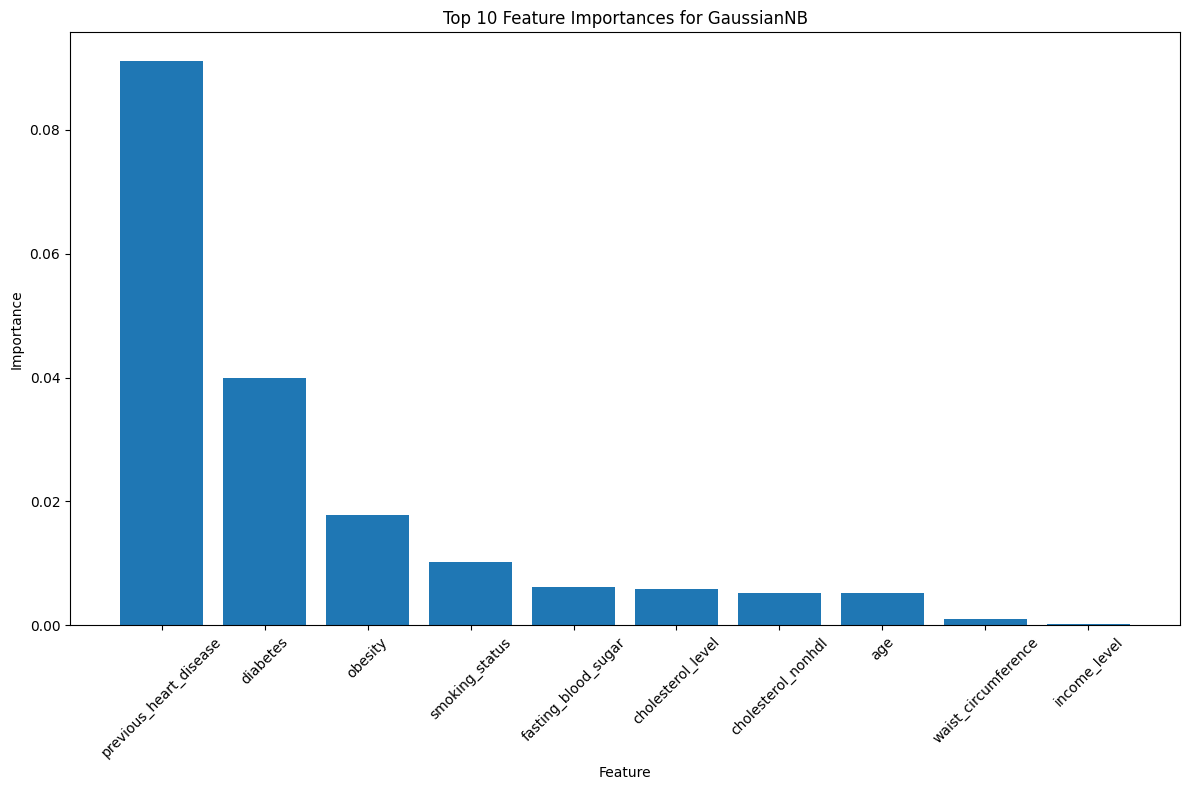

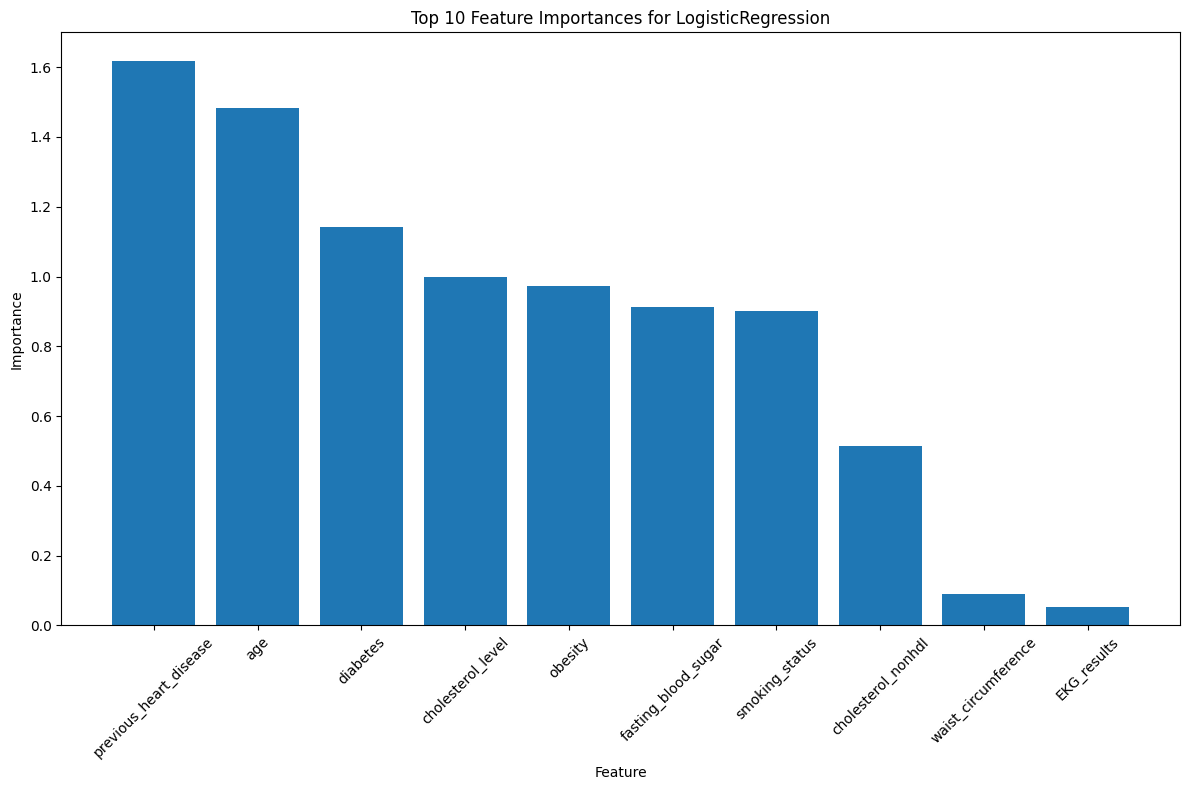

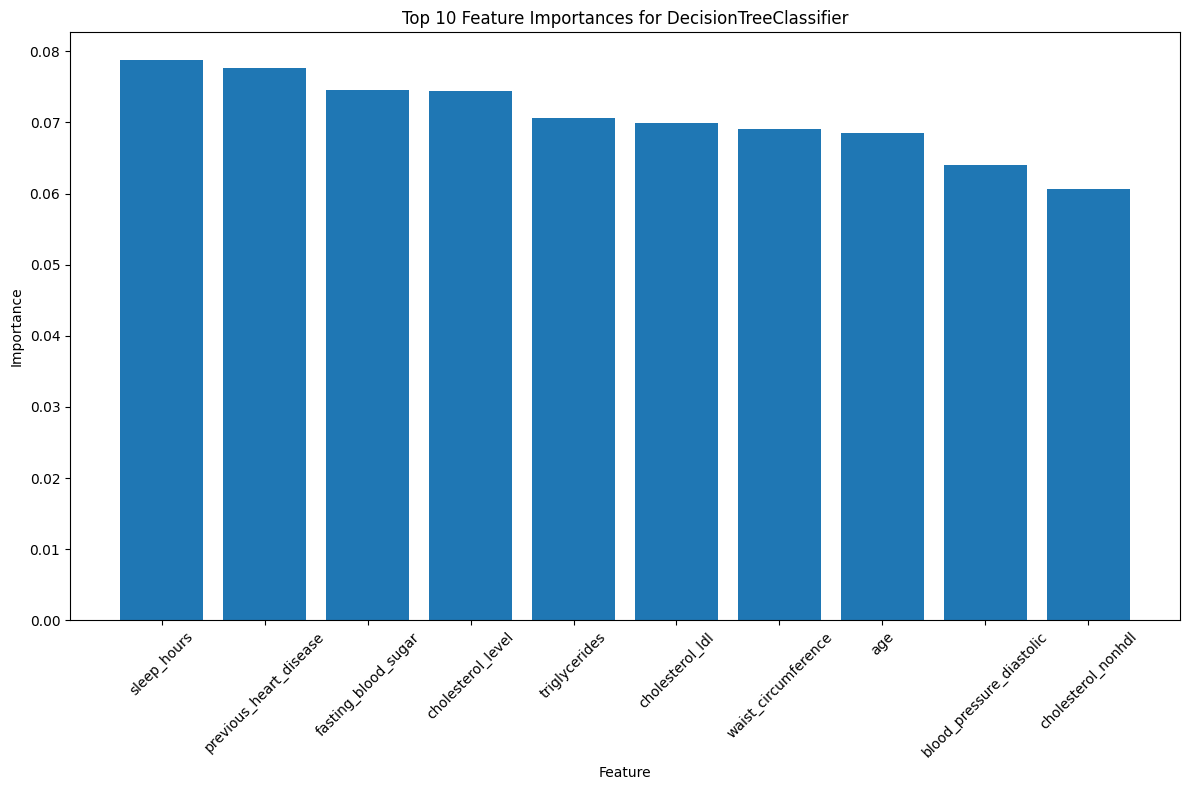

In [ ]:
get_testing_results(df_scaled)